<a href="https://www.kaggle.com/code/vengadesaboopathi/object-detection-yolov9-venkiboo?scriptVersionId=179980274" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

In [7]:
# This is a label from the annotation folder. This label is .xml format.
with open("/kaggle/input/utensils-images/train/labels/0455-416-416-_jpg.rf.07b21723979a908972c9c3fb0c25f13f.txt") as f:
    contents = f.read()
    print(contents)

2 0.515625 0.49453125 0.753125 0.9890625


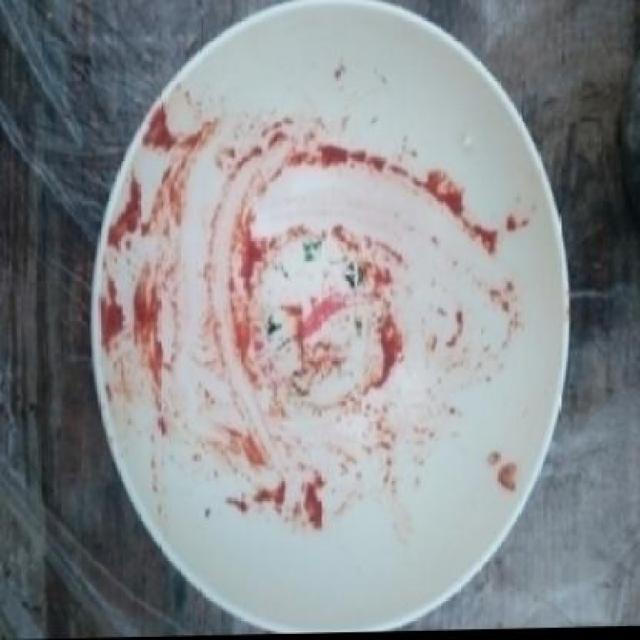

In [8]:
# This is image from the images folder.
Image.open("/kaggle/input/utensils-images/train/images/0455-416-416-_jpg.rf.07b21723979a908972c9c3fb0c25f13f.jpg")

In [9]:
# # Create a folder of train dataset
# if not os.path.isfile("/kaggle/working/data"):
#     os.mkdir('/kaggle/working/data')
#     os.mkdir('/kaggle/working/data/train')
#     os.mkdir('/kaggle/working/data/val')
#     os.mkdir('/kaggle/working/data/test')
#     os.mkdir('/kaggle/working/data/train/images')
#     os.mkdir('/kaggle/working/data/train/labels')
#     os.mkdir('/kaggle/working/data/test/images')
#     os.mkdir('/kaggle/working/data/test/labels')
#     os.mkdir('/kaggle/working/data/val/images')
#     os.mkdir('/kaggle/working/data/val/labels')

In [10]:
# Create the data.yaml. I am going to use it on the train with yolov9.
yaml_text = """train: /kaggle/input/utensils-images/train/images
val: /kaggle/input/utensils-images/valid/images

nc: 5
names: ['cup', 'glass', 'plates', 'spoon', 'unwashed_utensils']
"""

with open("/kaggle/working/data/data.yaml", 'w') as file:
    file.write(yaml_text)


In [11]:
with open("/kaggle/working/data/data.yaml") as f:
    contents = f.read()
    print(contents)

train: /kaggle/input/utensils-images/train/images
val: /kaggle/input/utensils-images/valid/images

nc: 5
names: ['cup', 'glass', 'plates', 'spoon', 'unwashed_utensils']



In [12]:
# Download Github rep.
!git clone https://github.com/SkalskiP/yolov9.git

fatal: destination path 'yolov9' already exists and is not an empty directory.


In [13]:
# İnstall the req.
!pip install -r /kaggle/working/yolov9/requirements.txt -q

In [ ]:
# Train with YoloV9
"""
workers --> max dataloader workers (per RANK in DDP mode)
device --> cuda device, i.e. 0 or 0,1,2,3 or cpu
batch --> total batch size for all GPUs, -1 for autobatch
epochs --> total training epochs
data --> dataset.yaml path
img --> train, val image size (pixels)
cfg --> model.yaml path
weights --> initial weights path
name --> save to project/name
hyp --> hyperparameters path

**This parameters is my project parameters. You can make changes for your project.**
"""

!python /kaggle/working/yolov9/train_dual.py \
--workers 8 --device 0,1 --batch 16 --epochs 50 --min-items 0 --close-mosaic 15\
--data /kaggle/working/data/data.yaml \
--img 640 --cfg /kaggle/working/yolov9/models/detect/yolov9-c.yaml \
--weights '' --name yolov9-c --hyp /kaggle/working/yolov9/data/hyps/hyp.scratch-high.yaml 


2024-05-27 02:26:01.634435: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-27 02:26:01.634497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-27 02:26:01.636255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train_dual: weights=, cfg=/kaggle/working/yolov9/models/detect/yolov9-c.yaml, data=/kaggle/working/data/data.yaml, hyp=/kaggle/working/yolov9/data/hyps/hyp.scratch-hig

In [ ]:
Image.open("/kaggle/working/yolov9/runs/train/yolov9-c/train_batch1.jpg")

In [ ]:
Image.open("/kaggle/working/yolov9/runs/train/yolov9-c2/train_batch1.jpg")

In [ ]:
"""
**Detect**

weights --> model path or triton URL
conf --> confidence threshold
source --> file/dir/URL/glob/screen/0(webcam)
device --> cuda device, i.e. 0 or 0,1,2,3 or cpu
"""
!python /kaggle/working/yolov9/detect.py --weights /kaggle/working/yolov9/runs/train/yolov9-c/weights/best.pt \
--conf 0.1 --source /kaggle/input/utensils-images/test/images/0455-416-416-_jpg.rf.2e4e52a5cd6cd834e1f5ce756e40be51.jpg --device 0,1


In [ ]:
Image.open("/kaggle/working/yolov9/runs/detect/exp2/0455-416-416-_jpg.rf.2e4e52a5cd6cd834e1f5ce756e40be51.jpg")